[View in Colaboratory](https://colab.research.google.com/github/SakshiPriya/denoising-autoencoder/blob/master/dae.ipynb)

In [1]:
!pip install torch 
!pip install torchvision

    100% |████████████████████████████████| 519.5MB 26kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x59ee0000 @  0x7fd1f44d61c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 5.6MB/s 
    100% |████████████████████████████████| 2.0MB 11.6MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [3]:
 !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
 !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
 !apt-get update -qq 2>&1 > /dev/null
 !apt-get -y install -qq google-drive-ocamlfuse fuse
 from google.colab import auth
 auth.authenticate_user()
 from oauth2client.client import GoogleCredentials
 creds = GoogleCredentials.get_application_default()
 import getpass
 !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
 vcode = getpass.getpass()
 !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
from torchvision import datasets,transforms
from torch.utils.data import DataLoader


In [0]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Lambda(lambda tensor:torch.round(tensor))])
trainset=datasets.MNIST('drive/app',train=True,download=True,transform=transform)
trainloader=DataLoader(trainset,batch_size=128,shuffle=True,num_workers=2)

In [0]:
import matplotlib.pyplot as plt
a=iter(trainloader)
def show_img(image,title):
  untransform=transforms.ToPILImage()
  image=untransform(image)
  plt.title(title)
  plt.imshow(image)
  



In [7]:
class autoencoder(nn.Module):
  def __init__(self):
    super(autoencoder,self).__init__()
    self.encoder=nn.Sequential(nn.Linear(28*28,256),nn.ReLU(True),nn.Linear(256,64),nn.ReLU(True))
    self.decoder=nn.Sequential(nn.Linear(64,256),nn.ReLU(True),nn.Linear(256,28*28),nn.Sigmoid())
  def forward(self,x):
    x=self.decoder(self.encoder(x))
    return x

device="cuda" if torch.cuda.is_available() else "cpu"
ae=autoencoder()
ae.to(device) 

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): ReLU(inplace)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=256, out_features=784, bias=True)
    (3): Sigmoid()
  )
)

In [0]:
def noise_add(image):
  noise=torch.rand_like(img)*0.5
  noise_img=img+noise
  noise_img=noise_img.type(dtype)
  noise_img.to(device)
  return noise_img

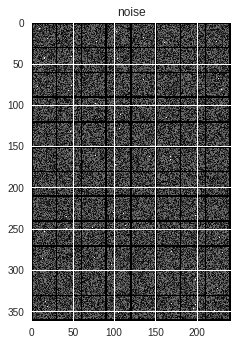

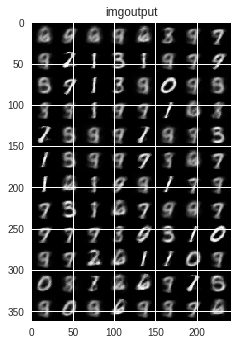

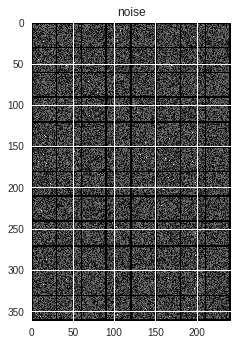

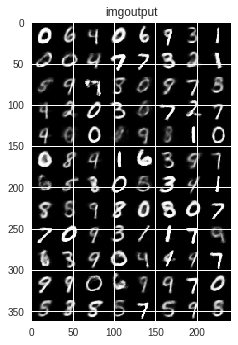

In [9]:
num_epoch=200
optimizer=optim.Adam(ae.parameters(),lr=0.01)
criterion=nn.MSELoss()
for i in range(num_epoch):
  for batch in trainloader:
    dtype=torch.cuda.FloatTensor
    img=batch[0].view(batch[0].size()[0],-1)
    img=img.type(dtype)
    img.to(device)
    #adding noise to image
    
    noise_img=noise_add(img)
    optimizer.zero_grad()
    out=ae(noise_img)
    
    loss=criterion(out,img)
    loss.backward()
    optimizer.step()
  if i%100==0:
   
    plt.figure()
    noise_img=noise_img.cpu().clone()
    noise_img=noise_img.view(noise_img.size()[0],1,28,28)
    show_img(torchvision.utils.make_grid(noise_img),'noise')
    plt.show()
    plt.figure()
    out=out.cpu().clone()
    out=out.view(out.size()[0],1,28,28)
    show_img(torchvision.utils.make_grid(out),'imgoutput')
    plt.show()
torch.save(ae.state_dict(),'drive/app/autoencoder')

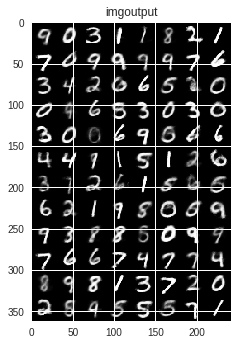

In [10]:
testset=datasets.MNIST('drive/app',train=False,download=True,transform=transform)
testloader=DataLoader(testset,batch_size=128,shuffle=True,num_workers=2)
b=iter(testloader)
k=b.next()[0]
#adding noise to image
nimg=noise_add(k)
out=ae(nimg)
plt.figure()
out=out.cpu().clone()
out=out.view(out.size()[0],1,28,28)
show_img(torchvision.utils.make_grid(out),'imgoutput')
plt.show()

In [8]:
from io import open
f=open('drive/app/autoencoder','rb')
print(f.read())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

